Итоговая работа
=====================

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).


Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# data = pd.read_csv('F:\\Program\\git_base\\GitHub\\MyRepo\\DVP_FIN\\taxi.csv')
# Так как на рабочем компе работает криво, сменим директорию
data = pd.read_csv('C:\\ProgramData\\Anaconda3\\Scripts\\taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [4]:
data.describe(include='all')

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economy,private,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48335,91207,NaN
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,NaN,NaN,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,NaN,NaN,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,NaN,NaN,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,NaN,NaN,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,NaN,NaN,1.000000


In [9]:
import pandas_profiling
# pandas_profiling.ProfileReport(data)
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="PandasProfiling.html")

F:\Python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


### Описание набора данных

* Кол-во строк 100 000.   
* Всего 14 признаков. Из них, предварительно: 9 числовых, 2 категориальных, 1 булевый и 2 непонятных (Rejected)


Предупреждения (Warnings)

* weekday_key -  14.4% нулевых значений
* hour_key has 6646 / 6.6% нулевых значений
* driver_latitude is highly skewed (γ1 = -26.369) Сильно скошен
* driver_longitude is highly correlated with driver_latitude (ρ = 0.9862) Сильная корреляция.
* origin_order_latitude is highly skewed (γ1 = -80.541) Сильно скошен  
* origin_order_longitude is highly skewed (γ1 = -72.689) Сильно скошен  
* distance_km is highly skewed (γ1 = 65.397) Сильно скошен  
* duration_min is highly correlated with distance_km (ρ = 0.97703) Высокая корреляция.

Оценка:
* Рассмотреть пропуски в признаках weekday_key, hour_key.
* Скос в координатах нормально, т.к. место одно и то же.
* Корреляция между duration_min и distance_km - обоснованно, т.к. действительно зависят. Можно оставить 1 из показателей.
* Какой таргет?

####  Разбираем показатели отдельно. 
**offer_gk**

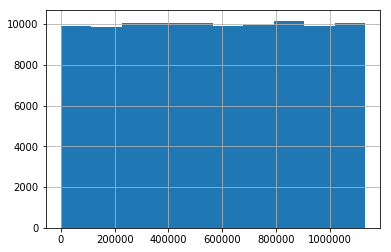

In [5]:
# Проверим распределение
data['offer_gk'].hist()

In [6]:
# Посмотрим из каких значений он состоит
print(data['offer_gk'].nunique(), data['offer_gk'].count())

100000 100000


Скорее всего это ID заказа, т.е. не числовое значение. Промежуточно, можно убрать из расчетов.  
Предполагаю, что признаки **driver_gk** и **order_gk** являются аналогичными

**weekday_key**

Профайлинг показывает, что **weekday_key** имеет 14.4% нулевых значений. Скорее всего обозначение 0 - Воскресенье и т.д.  (0-6)

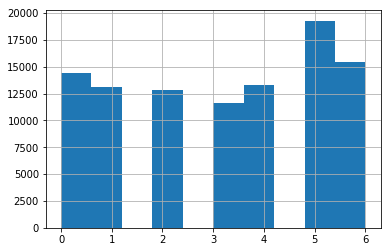

In [7]:
# Проверим распределение
data['weekday_key'].hist()

Данные дня недели - категориальные

**hour_key** - номер часа, может понадобится для группировки в временные отрезки и т.д. Нулевые значения, это просто 12 часов ночи

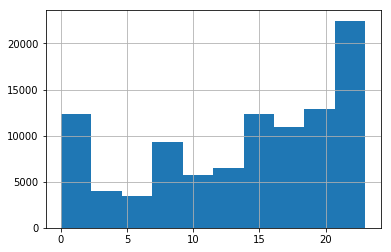

In [8]:
# Проверим распределение
data['hour_key'].hist()

Предположение: наиболее часто берут такси вечером и ночью, что логично.

**Координаты водителя и заказа**:  
driver_latitude	  
driver_longitude	  
origin_order_latitude  	
origin_order_longitude  


На данном этапе не вижу, зачем требуются данные признаки для задачи.  
Предположения: 
1. Вычислить районы и локации (зачем?)
2. Определить расстояние между водителем и заказом (зачем, т.к. есть параметр расстояние. Как? вроде есть библиотека)

**distance_km, duration_min**  
Большое кол-во значений (более четверти) -1. Судя по всему это пропуски # Около четверти значений без указания расстояния. Это очень много, нужно придумать, что дальше с этим делать
Так же видно, что duration_min коррелирует с данным признаком.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009874AC8>,
      dtype=object)

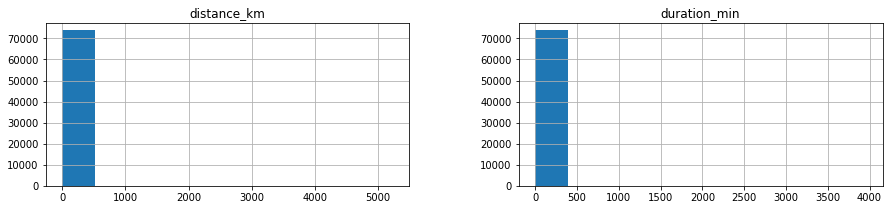

In [9]:
# Посмотрим распределение значений без -1
data.query('distance_km != -1')[['distance_km', 'duration_min']].hist(figsize = (15,3))
# data.query('distance_km != -1')[['distance_km']].hist()

**offer_class_group**  
Скорее всего это класс заявки

In [10]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

Категориальный признак. Можно использовать One-hot encoding

**ride_type_desc**  
Тип поездки: private, business, affiliate, SMB

**driver_response**  
Булевый признак, скорее всего взял заказ или нет. Предполагаю, это таргет.

## Описание зависимостей

In [11]:
# По профайлингу корреляция отсутствует.
# Построим матрицу только с учетом числовых значений.

In [12]:
# data_new = data[['offer_gk','weekday_key','hour_key', 'driver_gk', 'order_gk', 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude', 'distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]
data_new = data[['distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]

In [13]:
data_new.head()

,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,-1.000,-1.000,Economy,private,0
1,18.802,25.217,Standard,private,1
2,6.747,9.800,Economy,private,0
3,-1.000,-1.000,Economy,private,1
4,12.383,19.250,Economy,private,1


https://www.crowdanalytix.com/contests/mckinsey-big-data-hackathon

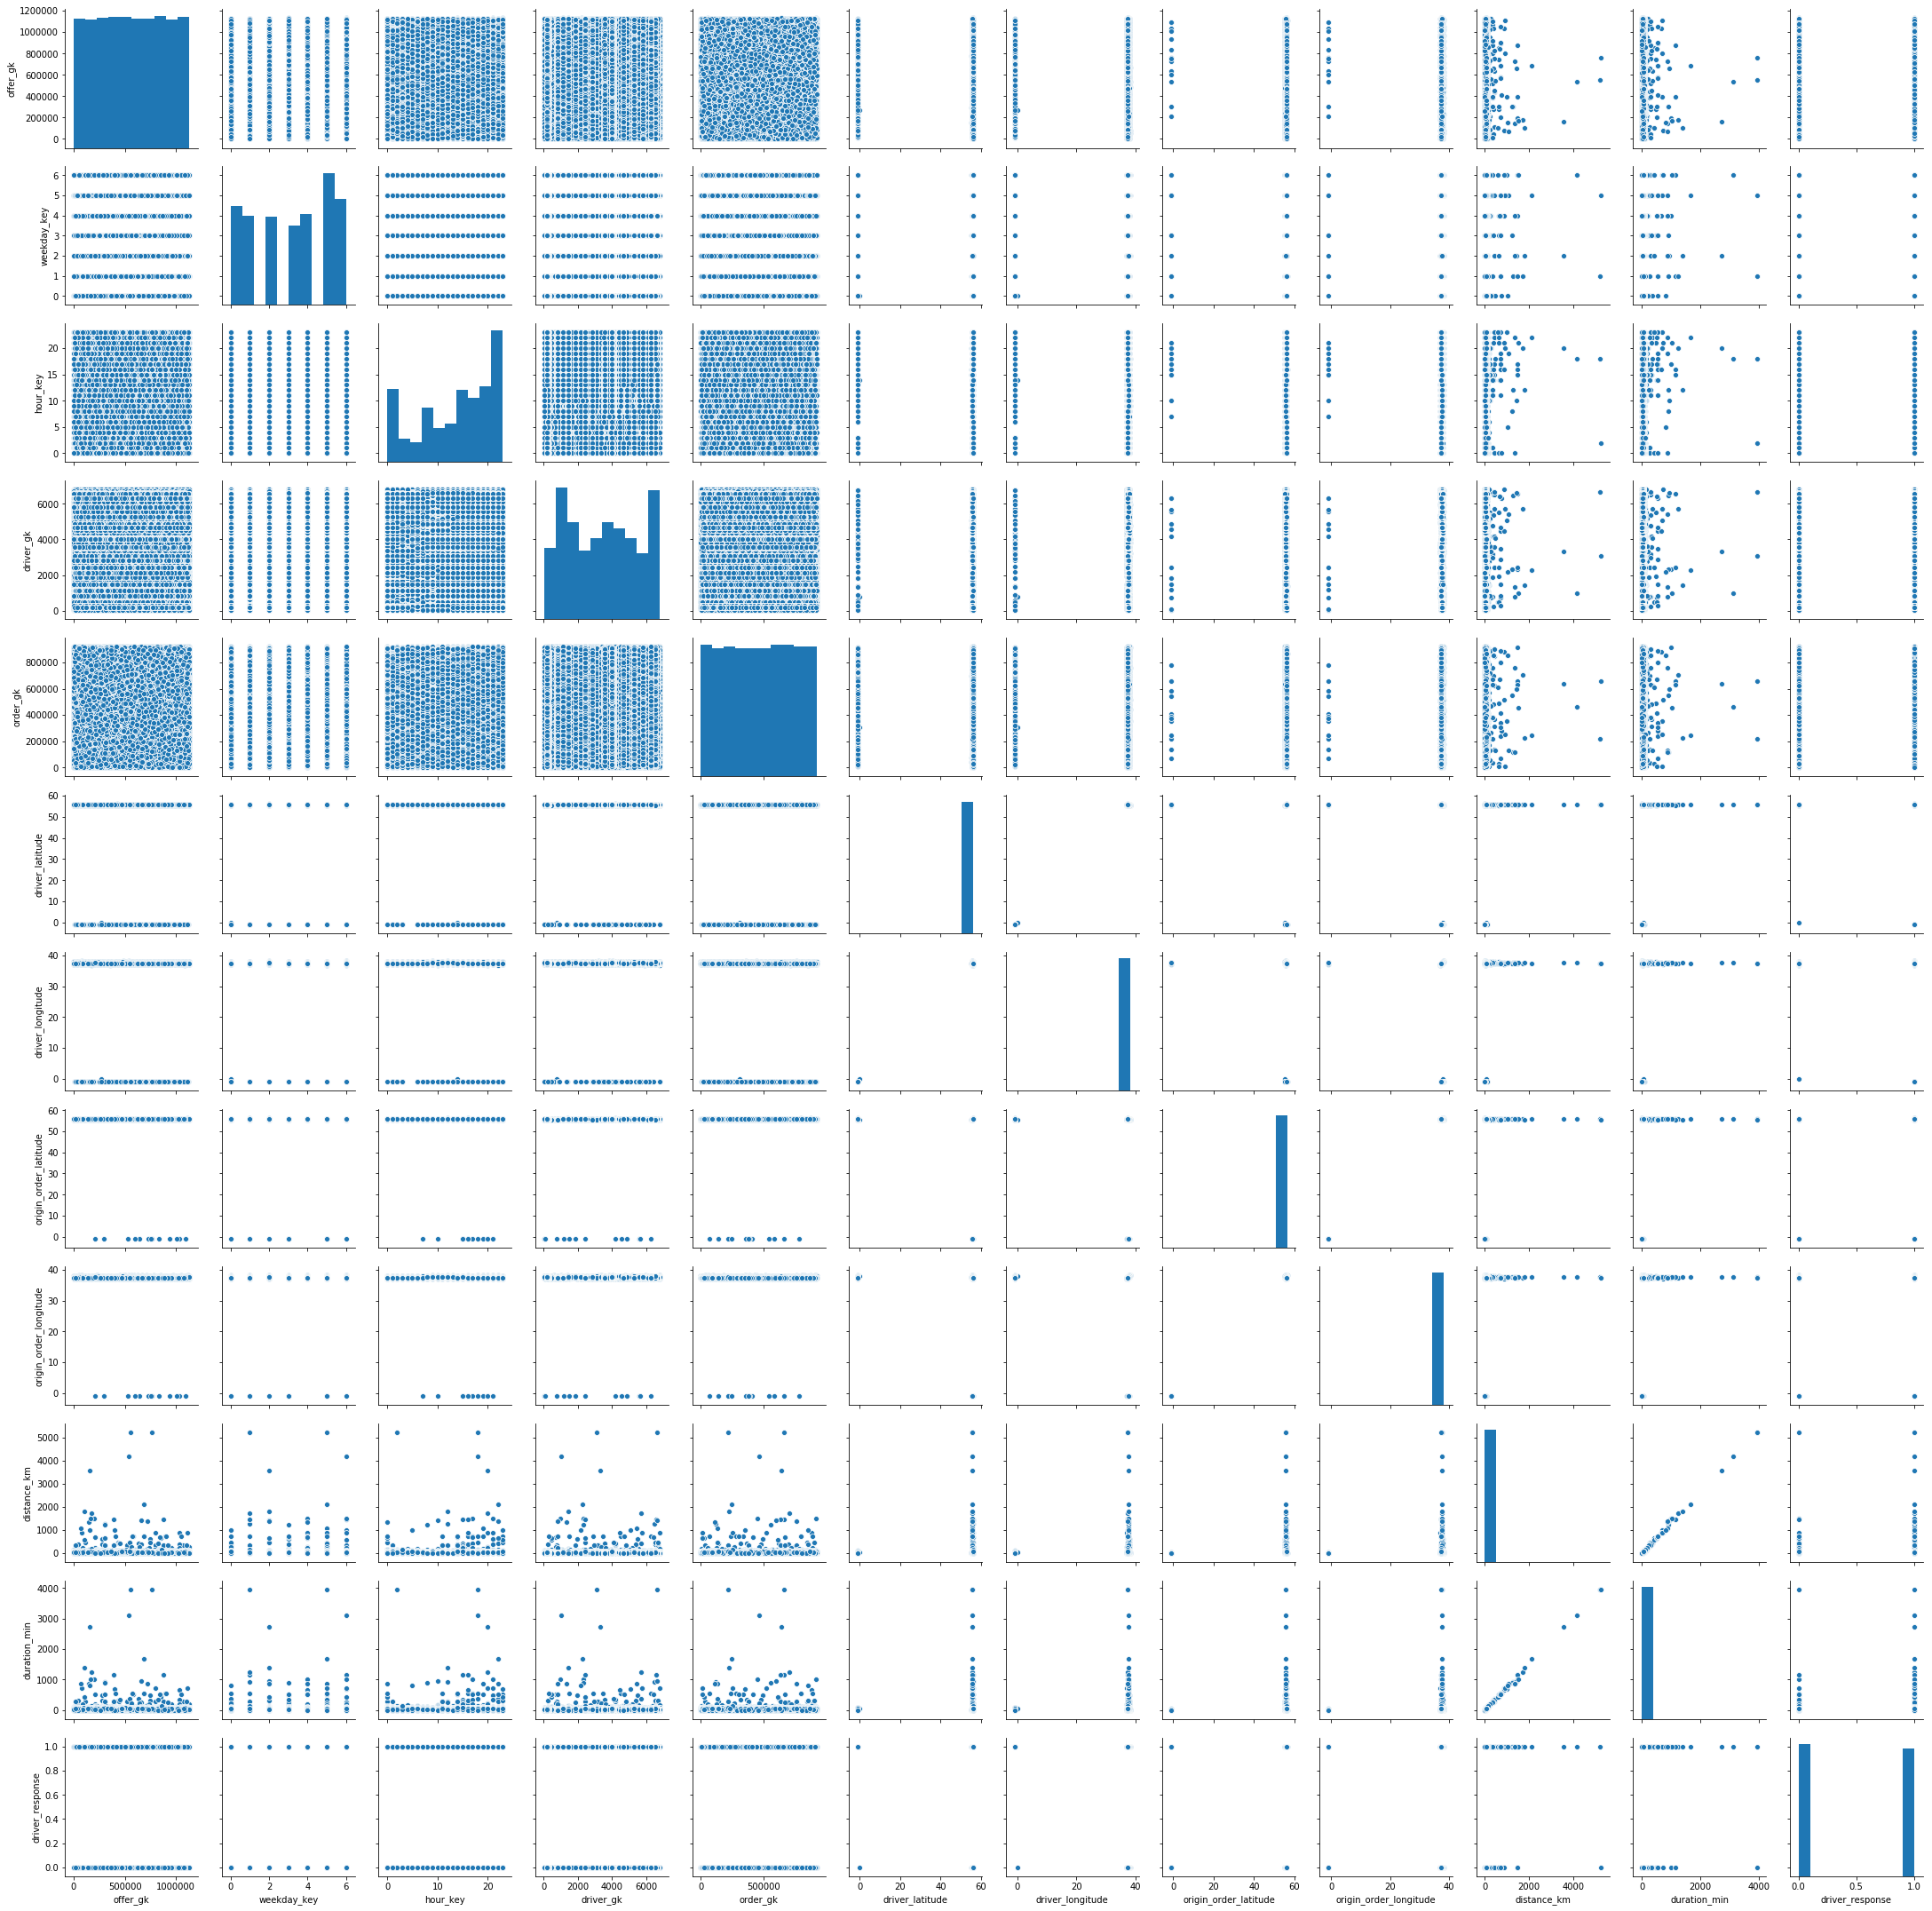

In [14]:
sns.pairplot(data)

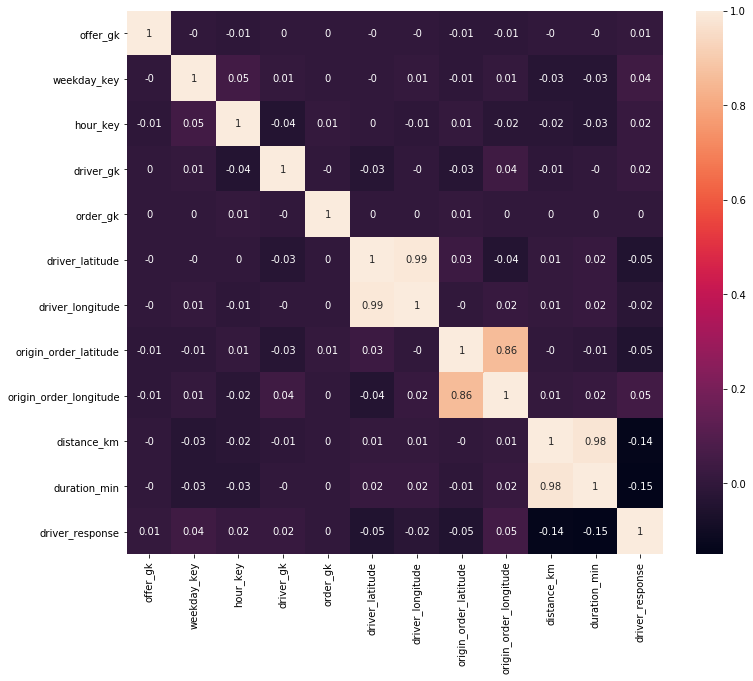

In [16]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

offer_gk
weekday_key	hour_key	
driver_gk	
order_gk	
driver_latitude	
driver_longitude	
origin_order_latitude	
origin_order_longitude	
distance_km	duration_min	
offer_class_group	
ride_type_desc	
driver_response

In [11]:
# https://ru.stackoverflow.com/questions/1021590/Расчет-расстояния-по-нескольким-координатам-python
# https://tproger.ru/translations/python-random-forest-implementation/


**driver_response** - Скорее всего, таргет


offer_gk – unique offer identifier (INT)  
weekday_key – day of week number (Sunday = 0, Monday = 1, etc.) (INT)  
hour_key – hour of day representing an hour part of datetime (value from 0 to 23) (INT)  
driver_gk – unique driver identifier (INT)  
order_gk – unique order identifier (INT). Order may have multiple offers  

Широта и долгота водителя и заказа  
driver_latitude           100000 non-null float64  
driver_longitude          100000 non-null float64  
origin_order_latitude     100000 non-null float64  
origin_order_longitude    100000 non-null float64  

distance_km – estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set
duration_min – estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set

offer_class_group – class of the order, e.g. Economy, Business, XL (VARCHAR)  
ride_type_desc – private or business order attribute (VARCHAR)

Скорее всего таргет  

driver_response – driver choice of whether to accept the offer or not (VARCHAR) 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Попробуем еще вариант

In [19]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
from scipy.stats import pearsonr

# data = pd.read_csv('C:\\ProgramData\\Anaconda3\\Scripts\\taxi.csv')
# data = pd.read_csv('taxi.csv')
# data.head(5)

In [21]:
# # Преобразование категориальной переменной 'offer_class_group'
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

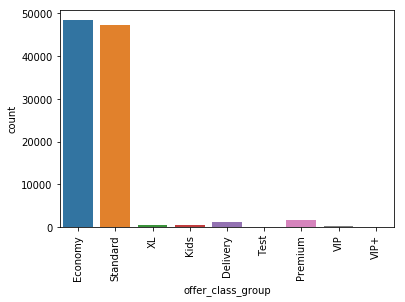

In [20]:
sns.countplot(x='offer_class_group', data=data)
plt.xticks(rotation=90)

In [23]:
offer_class_group = data['offer_class_group']
def offer_class_group_(x):
        if x =='Economy':
            return 3
        elif x == 'Standard':
            return 2
        return 1
data['offer_class_'] = data['offer_class_group'].apply(offer_class_group_)
data_1 = data.drop('offer_class_group', axis=1)
#data_1.head()

In [24]:
# Преобразование категориальной переменной 'ride_type_desc'
data_1['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

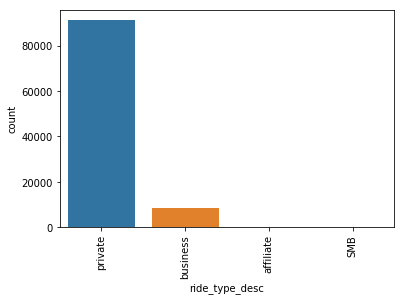

In [26]:
sns.countplot(x='ride_type_desc', data=data)
plt.xticks(rotation=90)

In [27]:
ride_type_desc = data['ride_type_desc']
def ride_type_desc_(x):
        if x =='private':
            return 3
        elif x == 'business':
            return 2
        return 1
data_1['ride_type_'] = data_1['ride_type_desc'].apply(ride_type_desc_)
data_2 = data_1.drop('ride_type_desc', axis=1)
data_2.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_,ride_type_
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,0,3,3
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,2,3
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,3,3
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,1,3,3
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,3


In [28]:
data_2.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_,ride_type_
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480,2.439580,2.909470
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946,0.577835,0.295863
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000,2.000000,3.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000,2.000000,3.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000,3.000000,3.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000,3.000000,3.000000


In [29]:
data.select_dtypes(include='object').mode()

,offer_class_group,ride_type_desc
0,Economy,private


In [30]:
data.select_dtypes(include='object').median()

Series([], dtype: float64)

In [31]:
collist = data_2.columns.values.tolist()
#collist

In [32]:
# Расчет медианы
print('Медиана offer_gk: ', statistics.median(data_2['offer_gk']))
print('Медиана weekday_key: ', statistics.median(data_2['weekday_key']))
print('Медиана hour_key: ', statistics.median(data_2['hour_key']))
print('Медиана driver_gk: ', statistics.median(data_2['driver_gk']))
print('Медиана driver_latitude: ', statistics.median(data_2['driver_latitude']))
print('Медиана driver_longitude: ', statistics.median(data_2['driver_longitude']))
print('Медиана origin_order_latitude: ', statistics.median(data_2['origin_order_latitude']))
print('Медиана origin_order_longitude: ', statistics.median(data_2['origin_order_longitude']))
print('Медиана distance_km: ', statistics.median(data_2['distance_km']))
print('Медиана duration_min: ', statistics.median(data_2['duration_min']))
print('Медиана driver_response: ', statistics.median(data_2['driver_response']))
print('Медиана offer_class_: ', statistics.median(data_2['offer_class_']))
print('Медиана ride_type_: ', statistics.median(data_2['ride_type_']))

Медиана offer_gk:  565671.5
Медиана weekday_key:  3.0
Медиана hour_key:  16.0
Медиана driver_gk:  3506.5
Медиана driver_latitude:  55.772904499999996
Медиана driver_longitude:  37.533664
Медиана origin_order_latitude:  55.772560999999996
Медиана origin_order_longitude:  37.532537000000005
Медиана distance_km:  10.4115
Медиана duration_min:  19.7
Медиана driver_response:  0.0
Медиана offer_class_:  2.0
Медиана ride_type_:  3.0


In [33]:
data_2.isnull().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
driver_response           0
offer_class_              0
ride_type_                0
dtype: int64

In [34]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
driver_response           100000 non-null int64
offer_class_              100000 non-null int64
ride_type_                100000 non-null int64
dtypes: float64(6), int64(8)
memory usage: 10.7 MB


In [35]:
# 4. Зависимость между параметрами данных
# 4.1 Корреляционная матрицу переменных

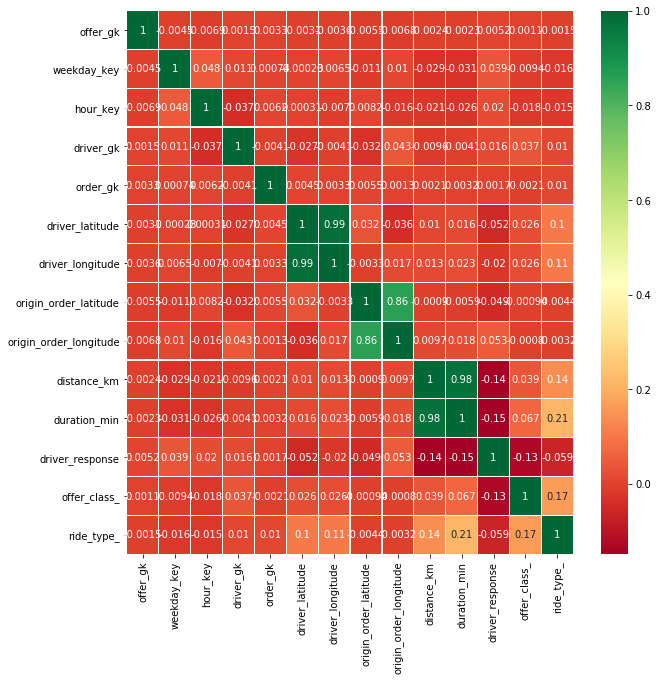

In [36]:
import seaborn as sns
sns.heatmap(data_2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [37]:
# 4.2 Визуализация взаимосвязи между переменными (scatter plots, гистограммы)

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

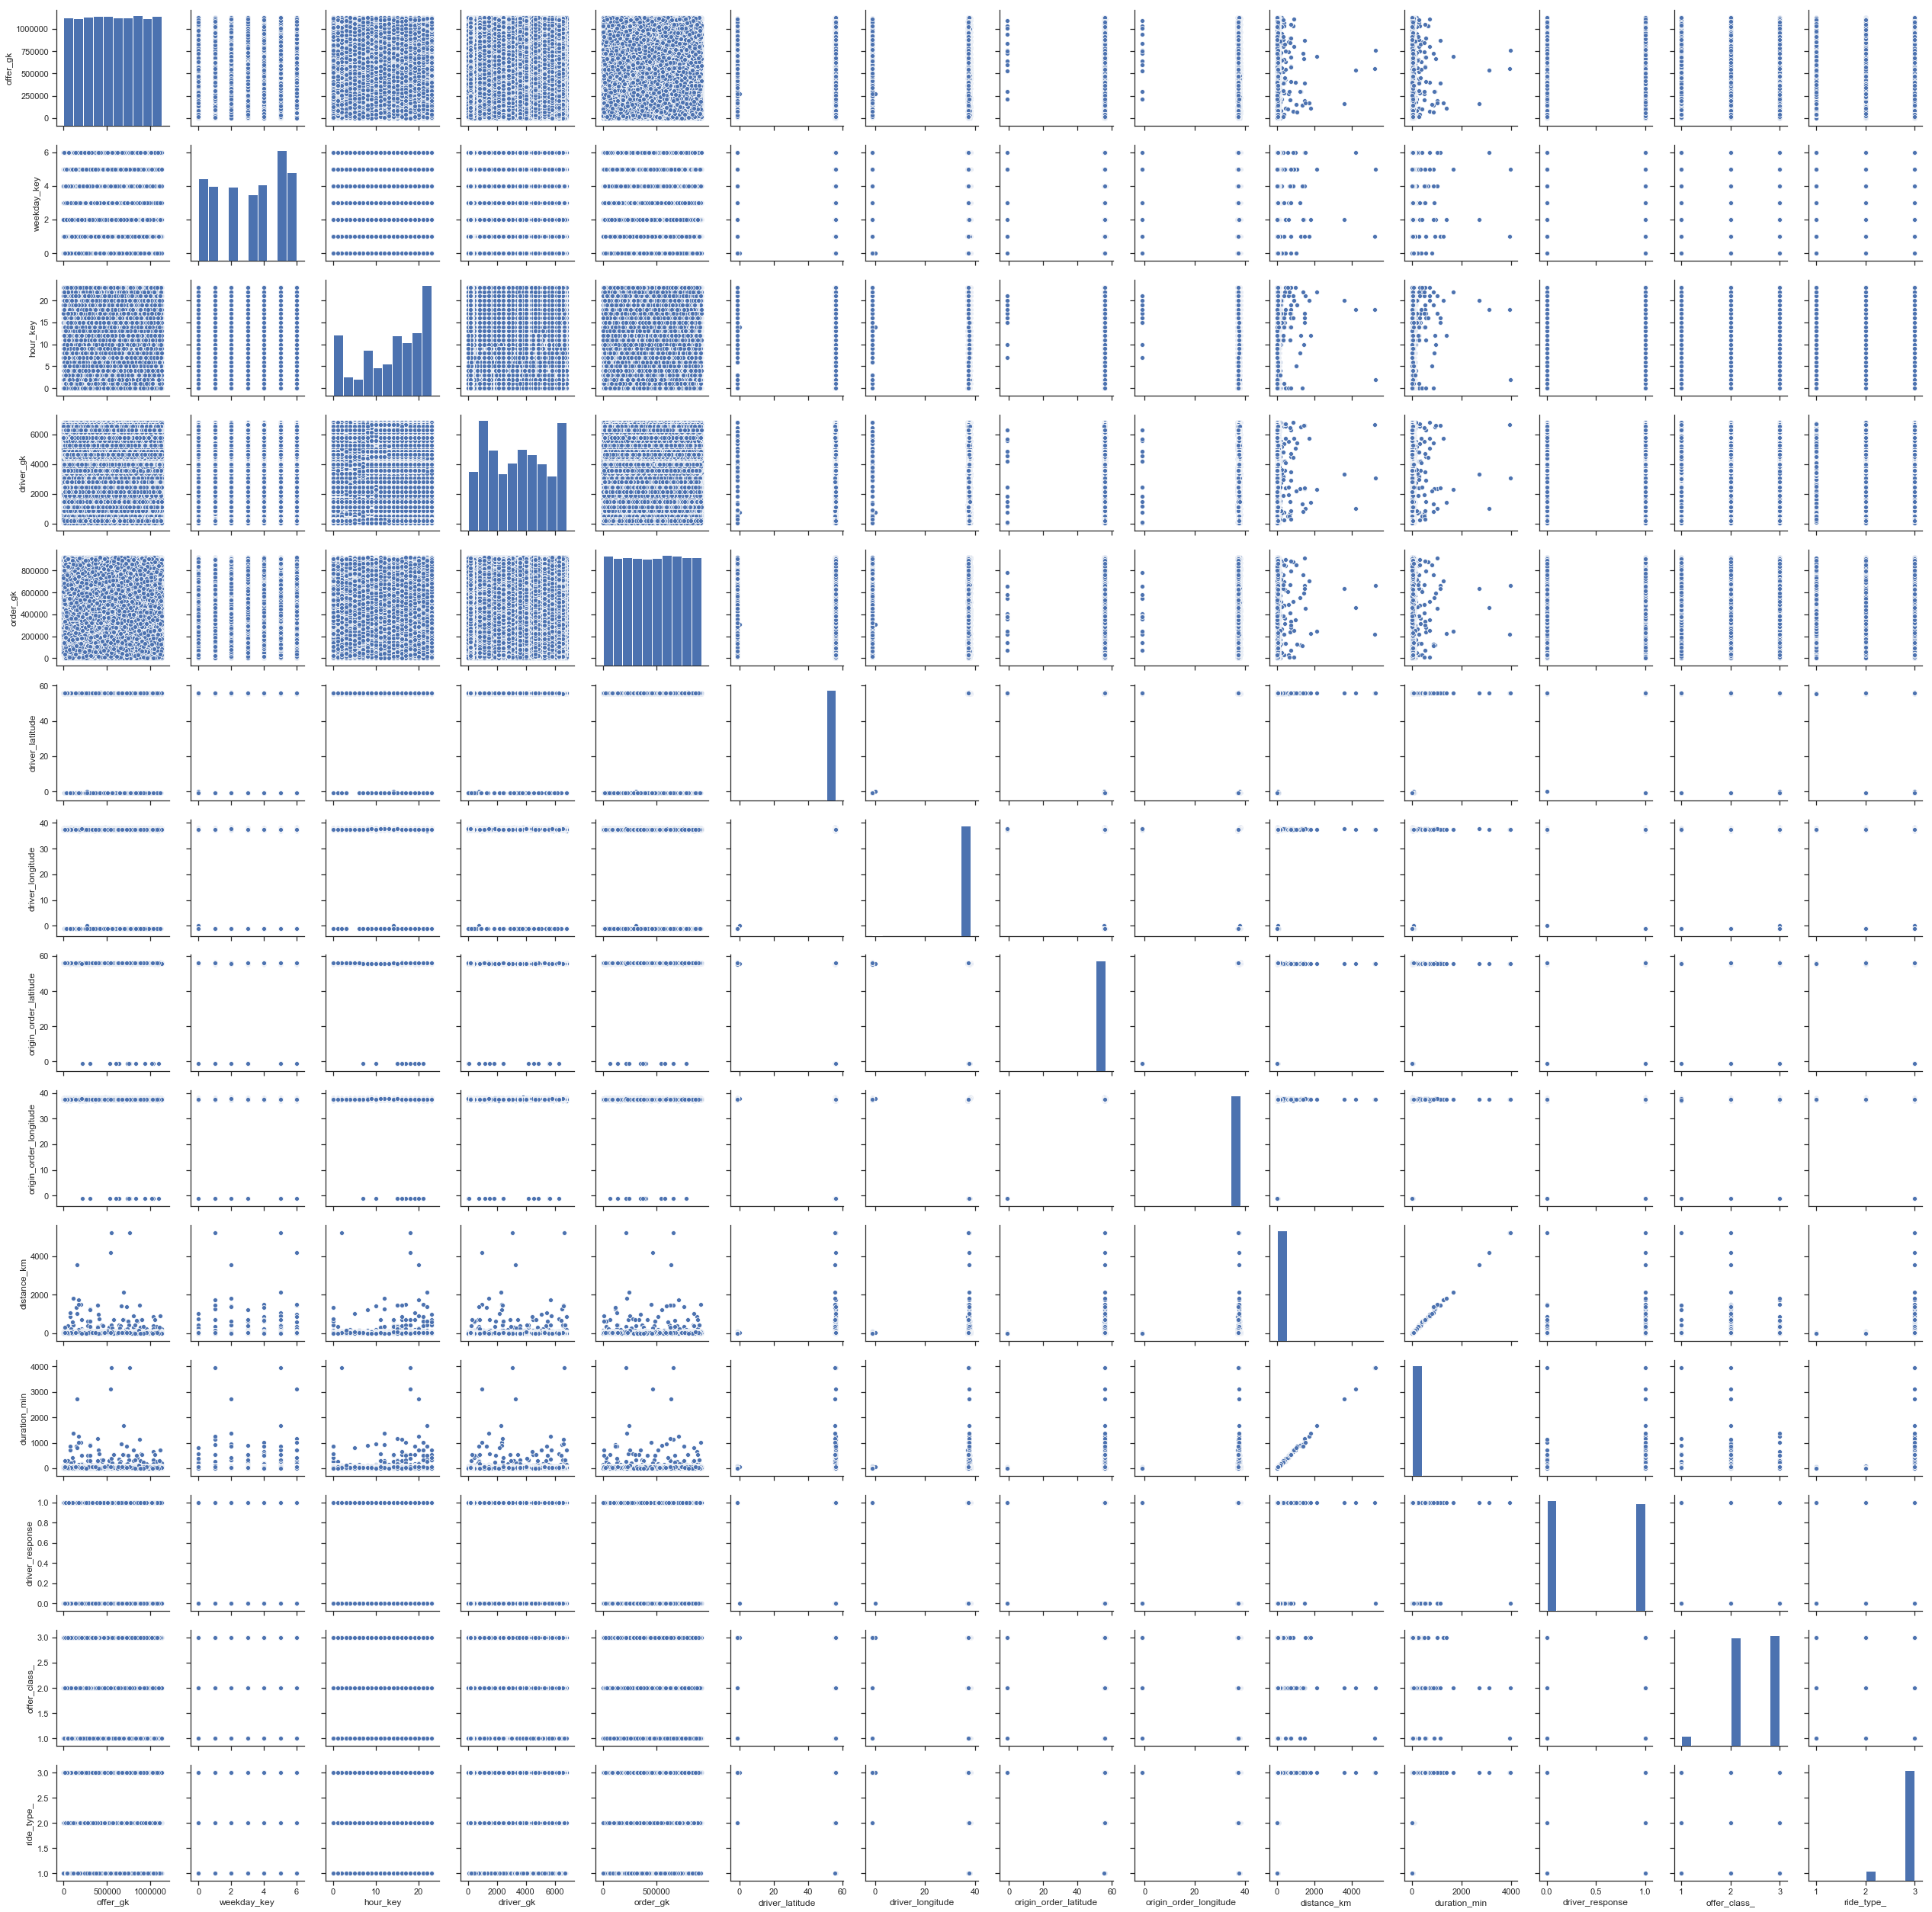

In [38]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_2)
sns.set

In [40]:
# Сильных взаимосвязей нет, кроме растояния и времени в минутах. Время в минутах можно удалить.
# Еще нужно решить, что делать с координатами

In [41]:
data_3 = data_2.drop('origin_order_latitude', axis=1)
data_3 = data_3.drop('origin_order_longitude', axis=1)
data_3 = data_3.drop('driver_latitude', axis=1)
data_3 = data_3.drop('duration_min', axis=1)
data_3.head()
#data_3.shape
#data_2.shape

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_longitude,distance_km,driver_response,offer_class_,ride_type_
0,1105373,5,20,6080,174182,37.334562,-1.000,0,3,3
1,759733,5,14,6080,358774,37.515023,18.802,1,2,3
2,416977,6,14,6080,866260,37.347688,6.747,0,3,3
3,889660,2,6,6080,163522,37.421748,-1.000,1,3,3
4,1120055,4,16,6080,506710,37.521602,12.383,1,3,3


In [42]:
data_3.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_longitude', 'distance_km', 'driver_response', 'offer_class_',
       'ride_type_'],
      dtype='object')

In [46]:
# 8. Обучить модель для предсказания возьмет ли водитель заказ ('driver_response')
# 8.1 Построим логистическую регресиию используя классическое разделение обучаемой и тестовой выборки - 70/30

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [49]:
X = data_3[['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_longitude', 'distance_km','offer_class_',
       'ride_type_']]
y = data_3['driver_response']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

NameError: name 'LogisticRegression' is not defined

In [56]:
# 9.2 Построим модель используя инструмент "Случайный лес"

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=9,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X, y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Значимость признаков:  [0.10191608 0.65351288 0.05913993 0.03598146 0.04503979 0.02429704
 0.03119167 0.02414519 0.02477597]
Точность модели: 0.954


In [58]:
# Точность модели высокая 95%.
# Попробую убрать еще несколько параметров, чтобы улучшить точность модели: 
# уберу из модели gfhfvtnhs 'offer_gk' и 'order_gk', так как они, 
# судя по матрице корреляций абсолютно не коррелируют с другими признаками

In [60]:
X = data_3[['weekday_key', 'hour_key', 'driver_gk',
       'driver_longitude', 'distance_km','offer_class_',
       'ride_type_']]
y = data_3['driver_response']

X, y = make_classification(n_samples=1000, n_features=7,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X, y))

Значимость признаков:  [0.13663539 0.63209401 0.03104549 0.03938573 0.04520858 0.07718769
 0.0384431 ]
Точность модели: 0.952


In [61]:
# Точность модели снизилась
# Так что оставим первый вариан модели "Случайный лес"

Попробуем рассчитать расстояние по координатам

In [63]:
from geopy.distance import geodesic
import numpy as np

ModuleNotFoundError: No module named 'geopy'

In [62]:


lat = np.array([22.5726, 28.7041, 6.9270])
lon = np.array([88.3639, 77.1025, 79.8612])

dist = 0
for i in range(len(lat)):
    dist += geodesic(lat[i], lon[i], ellipsoid='WGS-84').m

print(dist)    

ModuleNotFoundError: No module named 'geopy'

In [64]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,3
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,2
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,3
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,3
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,3


In [88]:
data[['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude']].head()

,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude
0,55.818842,37.334562,55.814567,37.355010
1,55.805342,37.515023,55.819329,37.466398
2,55.813978,37.347688,55.814827,37.354074
3,55.745922,37.421748,55.743469,37.431130
4,55.803578,37.521602,55.812559,37.527407


In [107]:
data.groupby(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'])['duration_min'].count()

driver_latitude  driver_longitude  origin_order_latitude  origin_order_longitude
-1.000000        -1.000000         55.336188              37.818830                  1
                                   55.387756              37.549058                  1
                                   55.396293              37.536240                  1
                                   55.410307              37.902451                  2
                                   55.414400              37.896652                  3
                                   55.415361              37.898917                 89
                                   55.443950              37.766172                  1
                                   55.508655              37.303141                  1
                                   55.566230              37.361771                  1
                                   55.592495              37.632218                  1
                                   55.593641     

In [115]:
data.query('driver_latitude == -1 & distance_km == -1').count()
# Можно удалять (122 - нормальное кол-во)

offer_gk                  122
weekday_key               122
hour_key                  122
driver_gk                 122
order_gk                  122
driver_latitude           122
driver_longitude          122
origin_order_latitude     122
origin_order_longitude    122
distance_km               122
duration_min              122
offer_class_group         122
ride_type_desc            122
driver_response           122
offer_class_              122
dtype: int64

In [116]:
# Незаполненное расстояние. 26,2% пропусков плохо. Попробуем определить исходя из других данных
data.query('distance_km == -1').count()

offer_gk                  26207
weekday_key               26207
hour_key                  26207
driver_gk                 26207
order_gk                  26207
driver_latitude           26207
driver_longitude          26207
origin_order_latitude     26207
origin_order_longitude    26207
distance_km               26207
duration_min              26207
offer_class_group         26207
ride_type_desc            26207
driver_response           26207
offer_class_              26207
dtype: int64

In [117]:
data[:5]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,3
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,2
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,3
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,3
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,3


In [67]:
# import numpy as np
# import pandas as pd
# import xarray as xr
# from geopy.distance import geodesic
# from timeit import default_timer as timer
# df = pd.DataFrame()
# city_coord_orig = (4.351749, 50.845701) 
# city_coord_orig_r = tuple(reversed(city_coord_orig))
# N = 100000
# np.random.normal()
# df['or'] = [city_coord_orig_r] * N
# df['new'] = df.apply(lambda x: (x['or'][0] + np.random.normal(), x['or'][1] + np.random.normal()), axis=1)
# start = timer()
# df['d2city2'] = df.apply(lambda x: geodesic(x['or'], x['new']).km, axis=1)
# end = timer()
# print(end - start)

In [68]:
import numpy as np
import pandas as pd
from sklearn.neighbors import DistanceMetric

In [70]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
# dist = DistanceMetric.get_metric('haversine')
  
# url = 'http://samplecsvs.s3.amazonaws.com/SacramentocrimeJanuary2006.csv'
# df = pd.read_csv(url, usecols=['latitude','longitude'])

In [83]:
# dist = DistanceMetric.get_metric('euclidean')
# X = data['driver_latitude']

In [82]:
# dist.pairwise(X)

In [81]:
# from haversine import haversine, Unit

In [123]:
# import scipy.spatial
# D = scipy.spatial.distance.cdist(F,S,lambda u, v: haversine(u, v))

In [72]:
# data['driver_latitude'][0]

In [121]:
# from shapely.geometry import Point

In [120]:
import scipy.spatial
F = data['driver_latitude']
S = data['driver_latitude']
D = scipy.spatial.distance.cdist(F,S,lambda u, v: haversine(u, v))

ValueError: XA must be a 2-dimensional array.

In [118]:
>>> 
>>> from pyproj import Proj
>>> nys = Proj(init='EPSG:32117')
>>> p1 = Point(43.374880, -78.119956)
>>> p2 = Point(43.374868, -78.119666)
>>> p1_proj = nys(p1.y, p1.x)
>>> p2_proj = nys(p2.y, p2.x)
>>> d = Point(p1_proj).distance(Point(p2_proj))
>>> d

ModuleNotFoundError: No module named 'shapely'

In [124]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [128]:
haversine(37.515023, 55.805342, 37.466398, 55.819329)

3.4130920887019287

In [125]:
data[:5]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,3
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,2
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,3
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,3
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,3
